In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
import pandas as pd
%matplotlib inline
from torchvision import transforms
import os
import random

from PIL import Image
from tensorflow.keras.preprocessing import image
from os import listdir
from os.path import isfile, join
import shutil
import stat
import collections
from collections import defaultdict

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

import h5py
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.applications.inception_v3 import preprocess_input
from keras.models import load_model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D, Dense, Dropout,Flatten, Conv2D,GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras import layers
from tensorflow.keras.models import Model

In [ ]:
!wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
!tar xzvf food-101.tar.gz

Streaming output truncated to the last 5000 lines.
food-101/images/cannoli/695879.jpg
food-101/images/cannoli/1767088.jpg
food-101/images/cannoli/3201965.jpg
food-101/images/cannoli/3778102.jpg
food-101/images/cannoli/2674065.jpg
food-101/images/cannoli/1169899.jpg
food-101/images/cannoli/1378086.jpg
food-101/images/cannoli/803909.jpg
food-101/images/cannoli/1067240.jpg
food-101/images/cannoli/3002709.jpg
food-101/images/cannoli/2612632.jpg
food-101/images/cannoli/3627612.jpg
food-101/images/cannoli/1798703.jpg
food-101/images/cannoli/560632.jpg
food-101/images/cannoli/512468.jpg
food-101/images/cannoli/2331523.jpg
food-101/images/cannoli/3118302.jpg
food-101/images/cannoli/1499412.jpg
food-101/images/cannoli/1557459.jpg
food-101/images/cannoli/146566.jpg
food-101/images/cannoli/96922.jpg
food-101/images/cannoli/1699562.jpg
food-101/images/cannoli/730051.jpg
food-101/images/cannoli/2177977.jpg
food-101/images/cannoli/2767028.jpg
food-101/images/cannoli/6564.jpg
food-101/images/cannoli/

## Data Exploration

In [ ]:
os.listdir('food-101/images')

['ice_cream',
 'beef_carpaccio',
 'donuts',
 'pho',
 'poutine',
 'garlic_bread',
 'hot_dog',
 'seaweed_salad',
 'french_onion_soup',
 'baklava',
 'red_velvet_cake',
 'ramen',
 'guacamole',
 'mussels',
 'breakfast_burrito',
 'beet_salad',
 'cheesecake',
 'creme_brulee',
 'steak',
 'churros',
 'falafel',
 'paella',
 'lasagna',
 'escargots',
 'filet_mignon',
 'shrimp_and_grits',
 'caprese_salad',
 'bibimbap',
 'spring_rolls',
 'clam_chowder',
 'deviled_eggs',
 'cheese_plate',
 'carrot_cake',
 'chocolate_mousse',
 'cannoli',
 'ravioli',
 'pancakes',
 'grilled_salmon',
 'waffles',
 'edamame',
 'macaroni_and_cheese',
 'spaghetti_carbonara',
 'prime_rib',
 'bruschetta',
 'chicken_wings',
 'tacos',
 'fried_rice',
 'frozen_yogurt',
 'chicken_curry',
 'grilled_cheese_sandwich',
 'dumplings',
 'miso_soup',
 'samosa',
 'sushi',
 'nachos',
 'beignets',
 'eggs_benedict',
 'hummus',
 'foie_gras',
 'tuna_tartare',
 'macarons',
 'bread_pudding',
 'caesar_salad',
 'chocolate_cake',
 'pulled_pork_sandwic

In [ ]:
def count_images(data_dir):
  total = 0
  path_count = 0
  for path in os.listdir(data_dir):
      count = 0 
      path_count += 1
      food_path = os.path.join(data_dir, path)
      for item in os.listdir(food_path):
        if os.path.isfile(os.path.join(food_path, item)):
          count += 1
          total += 1
      print(f' {path} Image Count: {count}')
  print(f' \nTotal Image Count: {total}')
  print(f' Class Count: {[path_count]}')   

In [ ]:
data_dir = 'food-101/images'
count_images(data_dir)

 ice_cream Image Count: 1000
 beef_carpaccio Image Count: 1000
 donuts Image Count: 1000
 pho Image Count: 1000
 poutine Image Count: 1000
 garlic_bread Image Count: 1000
 hot_dog Image Count: 1000
 seaweed_salad Image Count: 1000
 french_onion_soup Image Count: 1000
 baklava Image Count: 1000
 red_velvet_cake Image Count: 1000
 ramen Image Count: 1000
 guacamole Image Count: 1000
 mussels Image Count: 1000
 breakfast_burrito Image Count: 1000
 beet_salad Image Count: 1000
 cheesecake Image Count: 1000
 creme_brulee Image Count: 1000
 steak Image Count: 1000
 churros Image Count: 1000
 falafel Image Count: 1000
 paella Image Count: 1000
 lasagna Image Count: 1000
 escargots Image Count: 1000
 filet_mignon Image Count: 1000
 shrimp_and_grits Image Count: 1000
 caprese_salad Image Count: 1000
 bibimbap Image Count: 1000
 spring_rolls Image Count: 1000
 clam_chowder Image Count: 1000
 deviled_eggs Image Count: 1000
 cheese_plate Image Count: 1000
 carrot_cake Image Count: 1000
 chocolate_

In [ ]:
classes = os.listdir('food-101/images')
classes

['ice_cream',
 'beef_carpaccio',
 'donuts',
 'pho',
 'poutine',
 'garlic_bread',
 'hot_dog',
 'seaweed_salad',
 'french_onion_soup',
 'baklava',
 'red_velvet_cake',
 'ramen',
 'guacamole',
 'mussels',
 'breakfast_burrito',
 'beet_salad',
 'cheesecake',
 'creme_brulee',
 'steak',
 'churros',
 'falafel',
 'paella',
 'lasagna',
 'escargots',
 'filet_mignon',
 'shrimp_and_grits',
 'caprese_salad',
 'bibimbap',
 'spring_rolls',
 'clam_chowder',
 'deviled_eggs',
 'cheese_plate',
 'carrot_cake',
 'chocolate_mousse',
 'cannoli',
 'ravioli',
 'pancakes',
 'grilled_salmon',
 'waffles',
 'edamame',
 'macaroni_and_cheese',
 'spaghetti_carbonara',
 'prime_rib',
 'bruschetta',
 'chicken_wings',
 'tacos',
 'fried_rice',
 'frozen_yogurt',
 'chicken_curry',
 'grilled_cheese_sandwich',
 'dumplings',
 'miso_soup',
 'samosa',
 'sushi',
 'nachos',
 'beignets',
 'eggs_benedict',
 'hummus',
 'foie_gras',
 'tuna_tartare',
 'macarons',
 'bread_pudding',
 'caesar_salad',
 'chocolate_cake',
 'pulled_pork_sandwic

In [ ]:
image_paths = []

# put all the image paths in a list
for path in os.listdir(data_dir):
    food_path = os.path.join(data_dir, path)
    if os.path.isdir(food_path):
        for file in os.listdir(food_path):
            if file.endswith('.jpg'):
                image_paths.append(os.path.join(food_path, file))

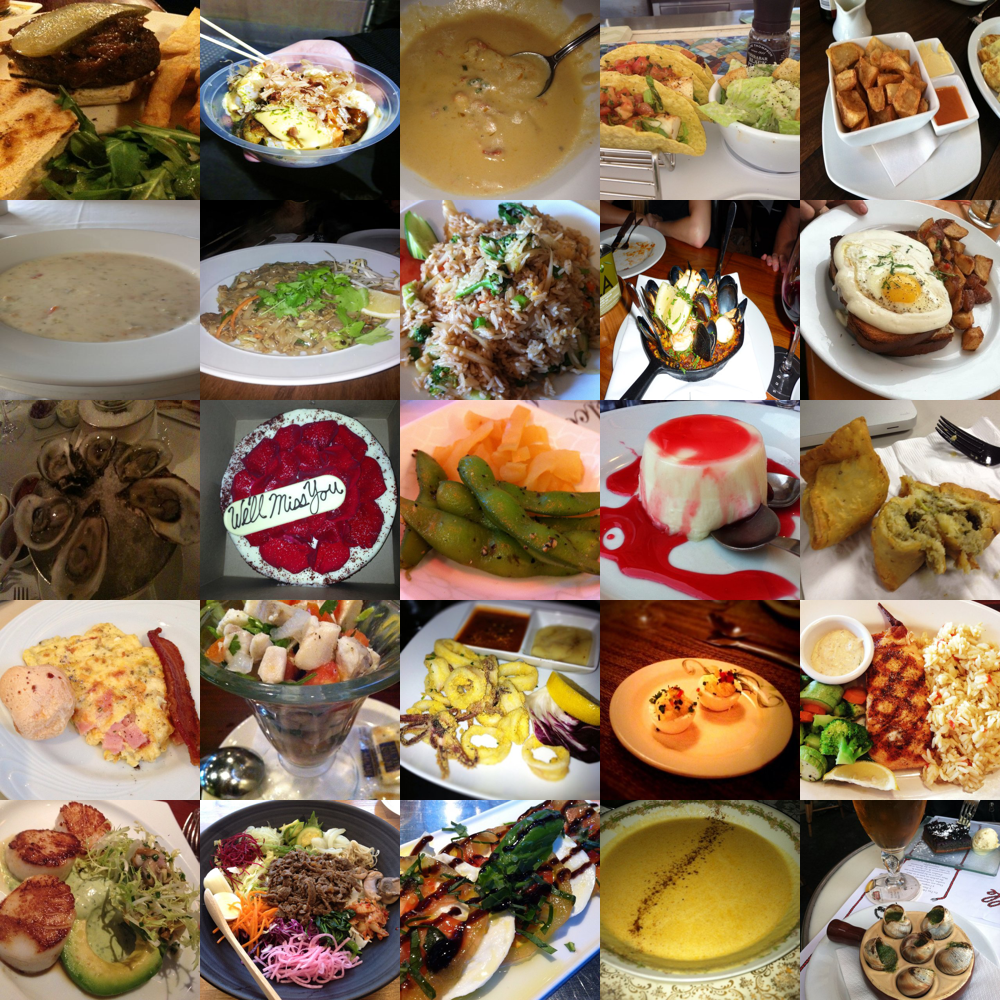

In [ ]:
# Choose 30 random images from the list
random_images = random.sample(image_paths, 25)

# Set the desired size of each image
image_size = (200, 200)

# Create a new image to hold all the images in a grid
grid_size = (5, 5)
grid_image = Image.new('RGB', (image_size[0] * grid_size[0], image_size[1] * grid_size[1]))

# Paste each image into the grid
for i, path in enumerate(random_images):
    with Image.open(path) as img:
        img = img.resize(image_size)
        x = (i % grid_size[0]) * image_size[0]
        y = (i // grid_size[0]) * image_size[1]
        grid_image.paste(img, (x, y))

# Display the grid image
grid_image.show()

## Data Preparation and Pre-processing

In [ ]:
# split dataset into train and test folders
from shutil import copy
def split_data(filepath, src,dest):
  classes_images = defaultdict(list)
  with open(filepath, 'r') as txt:
      paths = [read.strip() for read in txt.readlines()]
      for p in paths:
        food = p.split('/')
        classes_images[food[0]].append(food[1] + '.jpg')

  for food in classes_images.keys():
    #print("\nCopying images into ",food)
    if not os.path.exists(os.path.join(dest,food)):
      os.makedirs(os.path.join(dest,food))
    for i in classes_images[food]:
      copy(os.path.join(src,food,i), os.path.join(dest,food,i))
  print("Split Done!")

In [ ]:
#Make Training data
split_data('food-101/meta/train.txt', 'food-101/images', 'food-101/train')

Split Done!


In [ ]:
#Make Test data
split_data('food-101/meta/test.txt', 'food-101/images', 'food-101/test')

Split Done!


In [ ]:
train_dir = 'food-101/train'
print('Training Data Count:')
count_images(train_dir)

Training Data Count:
 ice_cream Image Count: 750
 beef_carpaccio Image Count: 750
 donuts Image Count: 750
 pho Image Count: 750
 poutine Image Count: 750
 garlic_bread Image Count: 750
 hot_dog Image Count: 750
 seaweed_salad Image Count: 750
 french_onion_soup Image Count: 750
 baklava Image Count: 750
 red_velvet_cake Image Count: 750
 ramen Image Count: 750
 guacamole Image Count: 750
 mussels Image Count: 750
 breakfast_burrito Image Count: 750
 beet_salad Image Count: 750
 cheesecake Image Count: 750
 creme_brulee Image Count: 750
 steak Image Count: 750
 churros Image Count: 750
 falafel Image Count: 750
 paella Image Count: 750
 lasagna Image Count: 750
 escargots Image Count: 750
 filet_mignon Image Count: 750
 shrimp_and_grits Image Count: 750
 caprese_salad Image Count: 750
 bibimbap Image Count: 750
 spring_rolls Image Count: 750
 clam_chowder Image Count: 750
 deviled_eggs Image Count: 750
 cheese_plate Image Count: 750
 carrot_cake Image Count: 750
 chocolate_mousse Image

In [ ]:
test_dir = 'food-101/test'
print('Testing Data Count:')
count_images(test_dir)

Testing Data Count:
 ice_cream Image Count: 250
 beef_carpaccio Image Count: 250
 donuts Image Count: 250
 pho Image Count: 250
 poutine Image Count: 250
 garlic_bread Image Count: 250
 hot_dog Image Count: 250
 seaweed_salad Image Count: 250
 french_onion_soup Image Count: 250
 baklava Image Count: 250
 red_velvet_cake Image Count: 250
 ramen Image Count: 250
 guacamole Image Count: 250
 mussels Image Count: 250
 breakfast_burrito Image Count: 250
 beet_salad Image Count: 250
 cheesecake Image Count: 250
 creme_brulee Image Count: 250
 steak Image Count: 250
 churros Image Count: 250
 falafel Image Count: 250
 paella Image Count: 250
 lasagna Image Count: 250
 escargots Image Count: 250
 filet_mignon Image Count: 250
 shrimp_and_grits Image Count: 250
 caprese_salad Image Count: 250
 bibimbap Image Count: 250
 spring_rolls Image Count: 250
 clam_chowder Image Count: 250
 deviled_eggs Image Count: 250
 cheese_plate Image Count: 250
 carrot_cake Image Count: 250
 chocolate_mousse Image 

In [ ]:
# train_mini and test_mini data samples
from shutil import copytree, rmtree
def dataset_mini(food_list, src, dest):
  if os.path.exists(dest):
    rmtree(dest) # remove folder if it already exists
  os.makedirs(dest)
  for food_item in food_list :
    #print("Copying images into",food_item)
    copytree(os.path.join(src,food_item), os.path.join(dest,food_item))

In [ ]:
# Pick 10 random food list for mini dataset
mini_food_list = []
for i in range(10):
  while True:
    rand_num = random.randint(0,len(classes)-1)
    if classes[rand_num] in mini_food_list:
      pass
    else:
      break
  mini_food_list.append(classes[rand_num])
print(mini_food_list)
mini_train_dir = 'food-101/train_mini'
mini_test_dir = 'food-101/test_mini'

['lasagna', 'deviled_eggs', 'lobster_bisque', 'chicken_wings', 'escargots', 'clam_chowder', 'nachos', 'foie_gras', 'seaweed_salad', 'prime_rib']


In [ ]:
#Creating Mini Train data
dataset_mini(mini_food_list, train_dir, mini_train_dir)
#Creating Mini Test data
dataset_mini(mini_food_list, test_dir, mini_test_dir)

In [ ]:
print('Mini Training Data Count:')
count_images(mini_train_dir)

Mini Training Data Count:
 seaweed_salad Image Count: 750
 lasagna Image Count: 750
 escargots Image Count: 750
 clam_chowder Image Count: 750
 deviled_eggs Image Count: 750
 prime_rib Image Count: 750
 chicken_wings Image Count: 750
 nachos Image Count: 750
 foie_gras Image Count: 750
 lobster_bisque Image Count: 750
 
Total Image Count: 7500
 Class Count: [10]


In [ ]:
print('Mini Testing Data Count:')
count_images(mini_test_dir)

Mini Testing Data Count:
 seaweed_salad Image Count: 250
 lasagna Image Count: 250
 escargots Image Count: 250
 clam_chowder Image Count: 250
 deviled_eggs Image Count: 250
 prime_rib Image Count: 250
 chicken_wings Image Count: 250
 nachos Image Count: 250
 foie_gras Image Count: 250
 lobster_bisque Image Count: 250
 
Total Image Count: 2500
 Class Count: [10]


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        mini_train_dir,
        target_size=(244, 244),
        batch_size=32,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        mini_test_dir,
        target_size=(244, 244),
        batch_size=32,
        class_mode='categorical')

train_full = train_datagen.flow_from_directory(
        train_dir,
        target_size=(244, 244),
        batch_size=32,
        class_mode='categorical')
validation_full = test_datagen.flow_from_directory(
        test_dir,
        target_size=(244, 244),
        batch_size=32,
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.
Found 75750 images belonging to 101 classes.
Found 25250 images belonging to 101 classes.


In [ ]:
labels = train_full.class_indices
labels_mini = train_generator.class_indices

In [ ]:
labels = dict((v,k) for k,v in labels.items())
labels_mini = dict((v,k) for k,v in labels_mini.items())


## Train the model (several model: CNN, RNN, Pretrained-cNN, ... )

## Base CNN

In [ ]:
#Create CNN
model1 = keras.Sequential([
    layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same', input_shape=(244,244,3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')
])

model1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model1.optimizer.lr=0.001

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 244, 244, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 122, 122, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 120, 120, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 60, 60, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 115200)            0         
                                                                 
 dense (Dense)               (None, 64)                7

In [ ]:
history_CNN = model1.fit(train_generator, validation_data= validation_generator, epochs=20,verbose=1)

Epoch 1/20
71/71 [==============================] - 53s 573ms/step - loss: 1.1907 - accuracy: 0.4471 - val_loss: 0.9935 - val_accuracy: 0.5747
Epoch 2/20
71/71 [==============================] - 40s 569ms/step - loss: 0.9172 - accuracy: 0.5996 - val_loss: 0.7491 - val_accuracy: 0.6827
Epoch 3/20
71/71 [==============================] - 40s 570ms/step - loss: 0.8596 - accuracy: 0.6369 - val_loss: 0.8238 - val_accuracy: 0.6587
Epoch 4/20
71/71 [==============================] - 42s 584ms/step - loss: 0.8560 - accuracy: 0.6338 - val_loss: 0.7695 - val_accuracy: 0.6907
Epoch 5/20
71/71 [==============================] - 40s 570ms/step - loss: 0.8008 - accuracy: 0.6773 - val_loss: 0.8391 - val_accuracy: 0.6387
Epoch 6/20
71/71 [==============================] - 42s 590ms/step - loss: 0.8259 - accuracy: 0.6324 - val_loss: 0.7076 - val_accuracy: 0.6853
Epoch 7/20
71/71 [==============================] - 41s 573ms/step - loss: 0.7764 - accuracy: 0.6698 - val_loss: 0.6694 - val_accuracy: 0.7293

## Evaluate the model

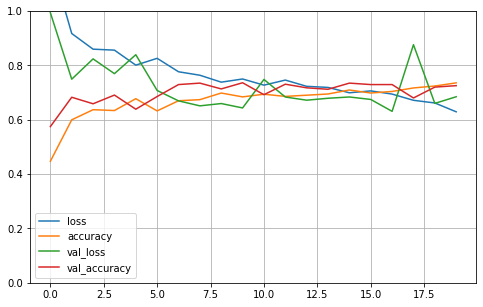

In [ ]:
#Evaluate the model
pd.DataFrame(history_CNN.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
test_loss, test_acc = model1.evaluate(validation_generator, verbose=2)
print('Test accuracy:', test_acc)


24/24 - 4s - loss: 0.6845 - accuracy: 0.7253 - 4s/epoch - 175ms/step
Test accuracy: 0.7253333330154419


## Fine-Tuning the model

In [ ]:
neurons = [32,64,128]
activations = ['relu', 'tanh']
optimizers = ['adam', 'SGD']


In [ ]:
def build_model(neurons, activation = 'relu', optimizer = 'adam'):
  #Create CNN
  model1 = keras.Sequential([
      layers.Conv2D(neurons*2, kernel_size=(3,3), activation=activation, padding='same', input_shape=(244,244,3)),
      layers.MaxPooling2D(pool_size=(2, 2)),
      
      layers.Conv2D(neurons, kernel_size=(3,3), activation=activation),
      layers.MaxPooling2D(pool_size=(2, 2)),
      
      layers.Flatten(),
      layers.Dense(neurons*2, activation=activation),
      layers.Dropout(0.5),
      layers.Dense(3, activation='softmax')
  ])

  model1.compile(
      optimizer=optimizer,
      loss='categorical_crossentropy',
      metrics=['accuracy']
  )
  model1.optimizer.lr=0.001
  model1.fit(train_generator, validation_data= validation_generator, epochs=1,verbose=1)
  test_loss, test_acc = model1.evaluate(validation_generator, verbose=2)
  return test_loss, test_acc

In [ ]:
nn = []
act = []
opt = []

test_losses = []
test_accs = []

In [ ]:
for optimizer in optimizers:
  for activation in activations:
    for neuron in neurons:
      print('optimizer: ', optimizer)
      print('activation: ', activation)
      print('Neurons: ', neuron)
      test_loss, test_acc = build_model(neuron, activation, optimizer)
      
      nn.append(neuron)
      act.append(activation)
      opt.append(optimizer)
      test_losses.append(test_loss)
      test_accs.append(test_acc)
      
      print('Test accuracy:', test_acc)
      print('----------------------------')

optimizer:  adam
activation:  relu
Neurons:  32
71/71 [==============================] - 42s 569ms/step - loss: 1.3262 - accuracy: 0.4293 - val_loss: 0.9856 - val_accuracy: 0.5560
24/24 - 3s - loss: 0.9856 - accuracy: 0.5560 - 3s/epoch - 140ms/step
Test accuracy: 0.5559999942779541
----------------------------
optimizer:  adam
activation:  relu
Neurons:  64
71/71 [==============================] - 46s 609ms/step - loss: 1.5465 - accuracy: 0.4373 - val_loss: 0.9669 - val_accuracy: 0.6267
24/24 - 4s - loss: 0.9669 - accuracy: 0.6267 - 4s/epoch - 151ms/step
Test accuracy: 0.6266666650772095
----------------------------
optimizer:  adam
activation:  relu
Neurons:  128
71/71 [==============================] - 52s 667ms/step - loss: 1.8198 - accuracy: 0.3467 - val_loss: 1.0986 - val_accuracy: 0.3333
24/24 - 4s - loss: 1.0986 - accuracy: 0.3333 - 4s/epoch - 163ms/step
Test accuracy: 0.3333333432674408
----------------------------
optimizer:  adam
activation:  tanh
Neurons:  32
71/71 [========

In [ ]:
d = {'Optimizer':opt,'Activation':act, 'Neurons': nn, 'Test_Loss': test_losses, 'Test_Acc': test_accs}

In [ ]:
cnn_hp = pd.DataFrame(d)

In [ ]:
cnn_hp

Optimizer Activation  Neurons  Test_Loss  Test_Acc
0       adam       relu       32   0.985632  0.556000
1       adam       relu       64   0.966909  0.626667
2       adam       relu      128   1.098623  0.333333
3       adam       tanh       32   2.600191  0.333333
4       adam       tanh       64   1.099997  0.333333
5       adam       tanh      128   1.107522  0.333333
6        SGD       relu       32   1.054951  0.530667
7        SGD       relu       64   1.076016  0.353333
8        SGD       relu      128   1.072210  0.370667
9        SGD       tanh       32   1.006486  0.448000
10       SGD       tanh       64   0.964789  0.557333
11       SGD       tanh      128   0.952788  0.536000

In [ ]:
#Create Best CNN Model
best_model1 = keras.Sequential([
    layers.Conv2D(128, kernel_size=(3,3), activation='relu', padding='same', input_shape=(244,244,3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')
])

best_model1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
best_model1.optimizer.lr=0.001

In [ ]:
best_model1.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 244, 244, 128)     3584      
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 122, 122, 128)    0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 120, 120, 64)      73792     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 60, 60, 64)       0         
 g2D)                                                            
                                                                 
 flatten_14 (Flatten)        (None, 230400)            0         
                                                                 
 dense_28 (Dense)            (None, 128)             

In [ ]:
best_CNN = best_model1.fit(train_generator, validation_data= validation_generator, epochs=50,verbose=1)

Epoch 1/50
71/71 [==============================] - 44s 582ms/step - loss: 1.2210 - accuracy: 0.4733 - val_loss: 0.9039 - val_accuracy: 0.6227
Epoch 2/50
71/71 [==============================] - 42s 596ms/step - loss: 0.9560 - accuracy: 0.5884 - val_loss: 0.8005 - val_accuracy: 0.6840
Epoch 3/50
71/71 [==============================] - 43s 610ms/step - loss: 0.9142 - accuracy: 0.6156 - val_loss: 0.7777 - val_accuracy: 0.6613
Epoch 4/50
71/71 [==============================] - 41s 577ms/step - loss: 0.8640 - accuracy: 0.6391 - val_loss: 0.7546 - val_accuracy: 0.6800
Epoch 5/50
71/71 [==============================] - 41s 581ms/step - loss: 0.8201 - accuracy: 0.6520 - val_loss: 0.7625 - val_accuracy: 0.6640
Epoch 6/50
71/71 [==============================] - 41s 581ms/step - loss: 0.8156 - accuracy: 0.6560 - val_loss: 0.7825 - val_accuracy: 0.6840
Epoch 7/50
71/71 [==============================] - 42s 596ms/step - loss: 0.7691 - accuracy: 0.6769 - val_loss: 0.6796 - val_accuracy: 0.7293

In [ ]:
best_model1.save(r'C:\Users\Adrian\Desktop\CENTENNIAL\COMP313\best_cnn')

## Evaluate Fine-Tuned model

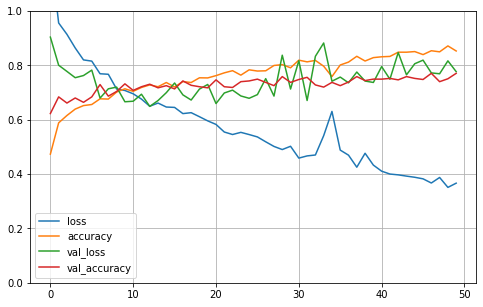

In [ ]:
#Evaluate the model
pd.DataFrame(best_CNN.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
test_loss, test_acc = best_model1.evaluate(validation_generator, verbose=2)
print('Test accuracy:', test_acc)

24/24 - 4s - loss: 0.7768 - accuracy: 0.7707 - 4s/epoch - 153ms/step
Test accuracy: 0.7706666588783264


### INCEPTION

In [ ]:
# Define image dimensions
IMG_WIDTH, IMG_HEIGHT = 299, 299

# Define batch size and number of epochs
BATCH_SIZE = 16
EPOCHS = 10

In [ ]:
# Load pre-trained InceptionV3 model
base_inc = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(IMG_WIDTH, IMG_HEIGHT, 3))

87910968/87910968 [==============================] - 6s 0us/step


In [ ]:
from keras.applications.inception_v3 import InceptionV3
inception = InceptionV3(weights='imagenet', include_top=False)
x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.2)(x)
# Add new classification layers to the model
x = base_inc.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)

predictions = Dense(len(labels_mini), activation='softmax')(x)
model_inc = Model(inputs=base_inc.input, outputs=predictions)

In [ ]:
# Freeze the pre-trained layers in the base model
for layer in base_inc.layers:
    layer.trainable = False

In [ ]:
# Compile the model with Adam optimizer and categorical cross-entropy loss function
model_inc.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint('model_inc{epoch:02d}.hdf5', save_freq='epoch') 


In [ ]:
history_inc = model_inc.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
    #callbacks=[checkpoint]
)
model_inc.save('model_inc_mini.hdf5')

Epoch 1/20
235/235 [==============================] - 160s 623ms/step - loss: 0.9227 - accuracy: 0.7185 - val_loss: 0.5172 - val_accuracy: 0.8228
Epoch 2/20
235/235 [==============================] - 146s 620ms/step - loss: 0.6265 - accuracy: 0.7947 - val_loss: 0.4967 - val_accuracy: 0.8344
Epoch 3/20
235/235 [==============================] - 147s 625ms/step - loss: 0.5350 - accuracy: 0.8201 - val_loss: 0.4620 - val_accuracy: 0.8396
Epoch 4/20
235/235 [==============================] - 146s 618ms/step - loss: 0.4791 - accuracy: 0.8415 - val_loss: 0.4398 - val_accuracy: 0.8540
Epoch 5/20
235/235 [==============================] - 145s 616ms/step - loss: 0.4432 - accuracy: 0.8499 - val_loss: 0.4545 - val_accuracy: 0.8540
Epoch 6/20
235/235 [==============================] - 145s 619ms/step - loss: 0.4118 - accuracy: 0.8587 - val_loss: 0.4626 - val_accuracy: 0.8492
Epoch 7/20
235/235 [==============================] - 145s 616ms/step - loss: 0.3869 - accuracy: 0.8663 - val_loss: 0.5110 -

In [ ]:
test_loss, test_acc = model_inc.evaluate(validation_generator, verbose=2)
print('Test accuracy:', test_acc)

79/79 - 14s - loss: 0.5399 - accuracy: 0.8504 - 14s/epoch - 180ms/step
Test accuracy: 0.8503999710083008


In [ ]:
inc_model = load_model('model_inc.hdf5')
pred_inc = inc_model.predict(validation_generator)
pred_inc = np.argmax(pred_inc, axis=1)
true_inc = validation_generator.classes

In [ ]:
#Confusion Matrix
import seaborn as sns    
from sklearn.metrics import confusion_matrix
#Confusion Matrix
cnn_v1_cm=confusion_matrix(true_inc, pred_inc,labels=range(101))
fig, ax  = plt.subplots(figsize=(100,100))
sns.heatmap(cnn_v1_cm, annot=True, fmt='g', ax=ax, cmap="Blues");  

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');

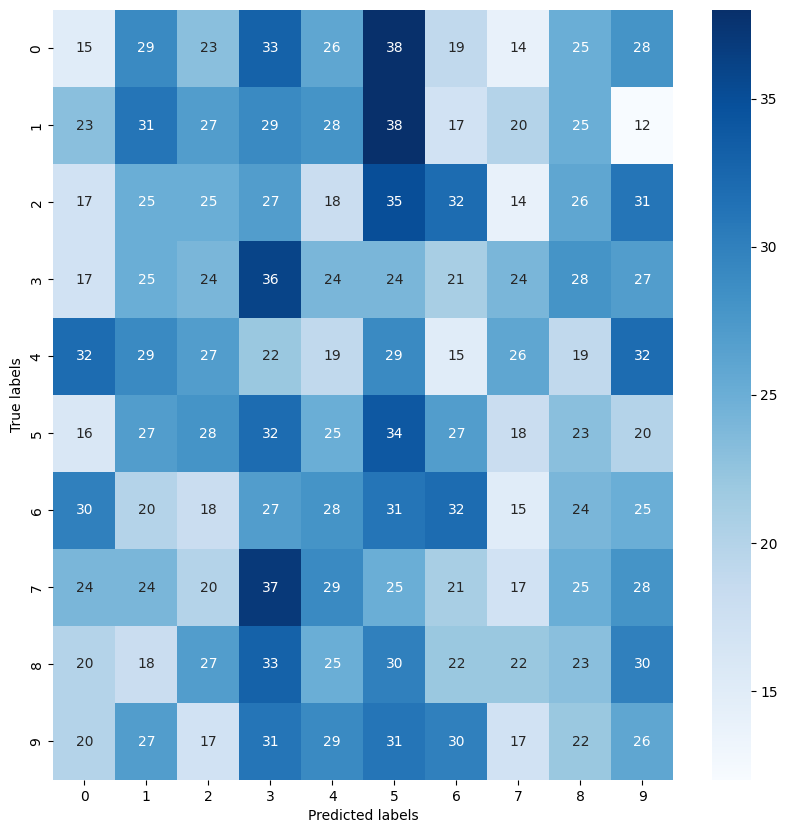

In [ ]:
#Confusion Matrix Mini
import seaborn as sns    
from sklearn.metrics import confusion_matrix
inc_cm=confusion_matrix(true_inc, pred_inc,labels=range(10))
fig, ax  = plt.subplots(figsize=(10,10))
sns.heatmap(inc_cm, annot=True, fmt='g', ax=ax, cmap="Blues");  

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');

In [ ]:
# Downloading images from internet using the URLs
!wget -O hummus.jpg https://cdn.apartmenttherapy.info/image/upload/f_jpg,q_auto:eco,c_fill,g_auto,w_1500,ar_1:1/k%2Farchive%2F28af3f00835c1564f1806eddff49a90a0f22dc79
!wget -O gyoza.jpg https://www.justonecookbook.com/wp-content/uploads/2020/04/Gyoza-3112-I-500x375.jpg
!wget -O sushi.jpg https://www.pressurecookrecipes.com/wp-content/uploads/2021/02/california-roll.webp
!wget -O lobster_roll.jpg https://hips.hearstapps.com/hmg-prod/images/delish-190612-lobster-rolls-233-landscape-pf-1564087379.jpg
!wget -O ramen.jpg https://glebekitchen.com/wp-content/uploads/2017/04/tonkotsuramenfront-500x375.jpg

--2023-03-19 07:01:33--  https://cdn.apartmenttherapy.info/image/upload/f_jpg,q_auto:eco,c_fill,g_auto,w_1500,ar_1:1/k%2Farchive%2F28af3f00835c1564f1806eddff49a90a0f22dc79
Resolving cdn.apartmenttherapy.info (cdn.apartmenttherapy.info)... 151.101.2.102, 151.101.66.102, 151.101.130.102, ...
Connecting to cdn.apartmenttherapy.info (cdn.apartmenttherapy.info)|151.101.2.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 245971 (240K) [image/jpeg]
Saving to: ‘hummus.jpg’

hummus.jpg          100%[===================>] 240.21K  --.-KB/s    in 0.03s   

2023-03-19 07:01:33 (7.82 MB/s) - ‘hummus.jpg’ saved [245971/245971]

--2023-03-19 07:01:33--  https://www.justonecookbook.com/wp-content/uploads/2020/04/Gyoza-3112-I-500x375.jpg
Resolving www.justonecookbook.com (www.justonecookbook.com)... 104.22.51.139, 172.67.22.245, 104.22.50.139, ...
Connecting to www.justonecookbook.com (www.justonecookbook.com)|104.22.51.139|:443... connected.
HTTP request sent, awaiting resp

In [ ]:
def predict(model, images, show = True):
  for img in images:
    img = image.load_img(img, target_size=(299, 299))
    img = image.img_to_array(img)                    
    img = np.expand_dims(img, axis=0)         
    img /= 255.                                      

    pred = model.predict(img)
    index = np.argmax(pred)
    classes.sort()
    pred_value = classes[index]
    if show:
        plt.imshow(img[0])                           
        plt.axis('off')
        plt.title(pred_value)
        plt.show()

1/1 [==============================] - 0s 34ms/step


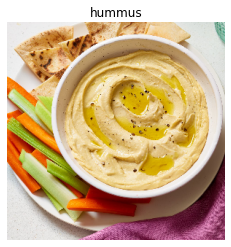

1/1 [==============================] - 0s 35ms/step


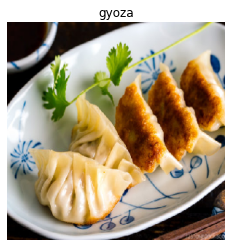

1/1 [==============================] - 0s 35ms/step


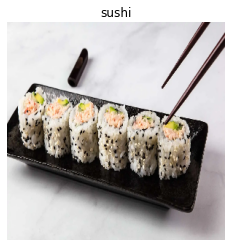

1/1 [==============================] - 0s 31ms/step


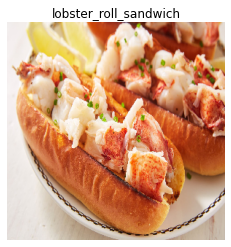

1/1 [==============================] - 0s 42ms/step


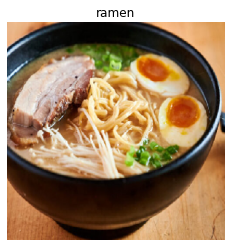

In [ ]:
# Make a list of downloaded images and test the trained model
images = []
images.append('hummus.jpg')
images.append('gyoza.jpg')
images.append('sushi.jpg')
images.append('lobster_roll.jpg')
images.append('ramen.jpg')
predict(model_inc, images, True)